# Day Three: Manipulating and Visualizing Data

In [1]:
import pandas as pd
print(pd.__version__)

2.2.2


## Setup
You do not need to download any additional files if you are running JupyterLab from the same directory as in the previous session. We will be finishing up the pipeline from Tuesday.

In [2]:
pd.set_option('display.max_columns', None)

## Datasets
* [CORGIS: Coffee Cupping Dataset](https://corgis-edu.github.io/corgis/csv/coffee/) - A *.csv* of professionally rated coffee varieties.
* [TidyTuesday: The Programming Language Database](https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-03-21/readme.md) - A *.csv* of programming languages and their origins.

In [3]:
coffee = pd.read_csv("data/coffee.csv")
coffee.head(5) # First five rows

,Location.Country,Location.Region,Location.Altitude.Min,Location.Altitude.Max,Location.Altitude.Average,Year,Data.Owner,Data.Type.Species,Data.Type.Variety,Data.Type.Processing method,Data.Production.Number of bags,Data.Production.Bag weight,Data.Scores.Aroma,Data.Scores.Flavor,Data.Scores.Aftertaste,Data.Scores.Acidity,Data.Scores.Body,Data.Scores.Balance,Data.Scores.Uniformity,Data.Scores.Sweetness,Data.Scores.Moisture,Data.Scores.Total,Data.Color
0,United States,kona,0,0,0,2010,kona pacific farmers cooperative,Arabica,NaN,NaN,25,45.3592,8.25,8.42,8.08,7.75,7.67,7.83,10.0,10.0,0.00,86.25,Unknown
1,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,300,60.0000,8.17,7.92,7.92,7.75,8.33,8.00,10.0,10.0,0.08,86.17,Unknown
2,Brazil,sul de minas - carmo de minas,12,12,12,2010,jacques pereira carneiro,Arabica,Yellow Bourbon,NaN,300,60.0000,8.42,7.92,8.00,7.75,7.92,8.00,10.0,10.0,0.01,86.17,Unknown
3,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,360,6.0000,7.67,8.00,7.83,8.00,7.92,7.83,10.0,10.0,0.00,85.08,Unknown
4,Ethiopia,sidamo,0,0,0,2010,ethiopia commodity exchange,Arabica,NaN,NaN,300,6.0000,7.58,7.83,7.58,8.00,7.83,7.50,10.0,10.0,0.10,83.83,Unknown


### A First Pipeline 

Let's turn back to the coffee dataset. 

Imagine your advisor has requested a .csv file named coffee_cleaned.csv with following columns **["Species", "Variety", "Color", "Country", "Bags"]**. 

They are not interested in coffees without a color value. 

They also do not want any rows with unknown or missing values in their columns of interest.

Finally, your advisor wants a chart that plots the total production (in bags) of coffee by country as a *.png* file. 

We can do all this in Pandas, if we break it down into a set of manageable steps.

To break this problem into steps, you need to...
1. select the columns of interest
2. renamed the columns to match what the client wants
3. filter the rows to those where color is NOT unknown
4. drop all rows with NaNs
5. create a chart and write it to a file
6. output DataFrame a CSV

In [4]:
# We want ["Species", "Variety", "Color", "Country", and "Bags"]
coffee_subset = coffee.loc[:,["Data.Type.Species", 
              "Data.Type.Variety", "Data.Color", "Location.Country", "Data.Production.Number of bags"]]

coffee_subset

,Data.Type.Species,Data.Type.Variety,Data.Color,Location.Country,Data.Production.Number of bags
0,Arabica,NaN,Unknown,United States,25
1,Arabica,Yellow Bourbon,Unknown,Brazil,300
2,Arabica,Yellow Bourbon,Unknown,Brazil,300
3,Arabica,NaN,Unknown,Ethiopia,360
4,Arabica,NaN,Unknown,Ethiopia,300
...,...,...,...,...,...
984,Arabica,Bourbon,Green,Guatemala,50
985,Arabica,Caturra,Green,Honduras,275
986,Robusta,NaN,Unknown,India,320
987,Robusta,NaN,Bluish-Green,India,320


## Rename: 
We can use [**rename()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) to pass in key-value pairs that map old names to new ones. We can use rename on either row names or column names. 

In this case, we want to rename columns, so we will use the *columns* keyword argument.

In [5]:
column_name_replacements = {"Data.Type.Species":"Species", 
                            "Data.Type.Variety":"Variety",
                            "Data.Color":"Color", 
                            "Location.Country":"Country", 
                            "Data.Production.Number of bags":"Bags"}
coffee_subset = coffee_subset.rename(columns=column_name_replacements)
coffee_subset

,Species,Variety,Color,Country,Bags
0,Arabica,NaN,Unknown,United States,25
1,Arabica,Yellow Bourbon,Unknown,Brazil,300
2,Arabica,Yellow Bourbon,Unknown,Brazil,300
3,Arabica,NaN,Unknown,Ethiopia,360
4,Arabica,NaN,Unknown,Ethiopia,300
...,...,...,...,...,...
984,Arabica,Bourbon,Green,Guatemala,50
985,Arabica,Caturra,Green,Honduras,275
986,Robusta,NaN,Unknown,India,320
987,Robusta,NaN,Bluish-Green,India,320


In [6]:
# Assign back to the original frame
coffee_subset = coffee_subset[coffee_subset["Color"] != "Unknown"]
coffee_subset

,Species,Variety,Color,Country,Bags
10,Arabica,Bourbon,Green,Brazil,3
11,Arabica,Bourbon,Green,Brazil,29
12,Arabica,Bourbon,Blue-Green,Brazil,7
13,Arabica,Bourbon,Blue-Green,Brazil,5
14,Arabica,Bourbon,Green,Brazil,4
...,...,...,...,...,...
983,Arabica,Catuai,Green,Honduras,15
984,Arabica,Bourbon,Green,Guatemala,50
985,Arabica,Caturra,Green,Honduras,275
987,Robusta,NaN,Bluish-Green,India,320


*Q: How do we know how many NaNs are in the current DataFrame per column?*

In [7]:
coffee_subset.isna().sum()

Species     0
Variety    96
Color      47
Country     0
Bags        0
dtype: int64

So, we need to drop some NaNs...

In [8]:
coffee_subset.dropna() # Does not modify the original
coffee_subset = coffee_subset.dropna() # Assign the copy back to the original variable

In [9]:
coffee_subset.info() # Check that we no longer have NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 10 to 988
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Species  743 non-null    object
 1   Variety  743 non-null    object
 2   Color    743 non-null    object
 3   Country  743 non-null    object
 4   Bags     743 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 34.8+ KB


## Writing to Files

Pandas can [write out files](https://pandas.pydata.org/docs/reference/io.html) to several formats, including CSVs, Excel files, JSON files, and even SQL databases. 

Today, we will use the [**.to_csv()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv) method available for all DataFrames.

First, let's make a directory for our output named `output`. You can either use the JupyterLab FileBrowser or a quick Python command.

In [10]:
import os
os.makedirs("output", exist_ok=True)

## Visualization in Pandas

### One Variable: Histograms
To provide your advisor with the chart they want, we're going to use the built-in plotting functionality of Pandas, which is a simplified wrapper based on [**matplotlib**](https://matplotlib.org/).

Given a quantitative Series, we can quickly plot its distribution with a histogram using the [**.hist()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html) method. This is a convenient way to visualize a *column* with one line of code.

<Axes: >

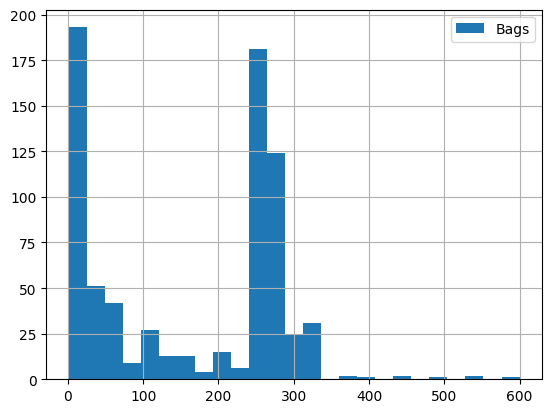

In [11]:
coffee_subset["Bags"].hist(bins=25, legend=True)

To get a sense of a *categorical* variable like `Country`, we can use the **value_counts** method to generate a Series that we can than plot with the **.plot.bar()** function.

In [12]:
coffee_subset["Country"].value_counts()

Country
Guatemala                       160
Mexico                          138
Colombia                        102
Honduras                         45
Brazil                           44
United States                    44
Costa Rica                       39
Tanzania, United Republic Of     33
Uganda                           25
Kenya                            19
China                            16
Indonesia                        13
Malawi                           11
Nicaragua                        10
Ethiopia                          8
Myanmar                           7
Haiti                             4
Thailand                          4
El Salvador                       4
Vietnam                           4
Panama                            3
Philippines                       3
Peru                              2
India                             2
Taiwan                            1
Rwanda                            1
Laos                              1
Name: count, dtype: 

<Axes: xlabel='Country'>

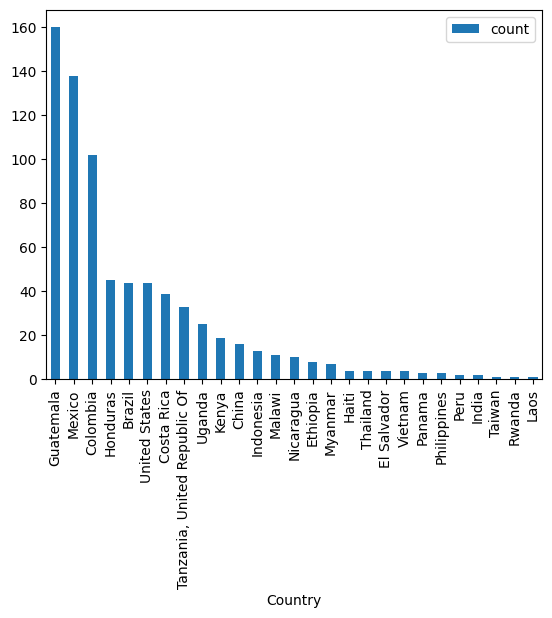

In [13]:
coffee_subset["Country"].value_counts().plot.bar(legend=True)

### Visualizing with .plot()

These options are fast, but they don't give us much control over the resulting graph. The [**.plot()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method takes in more arguments but allows us to control layout, suplots, titles, and styles.

<Axes: title={'center': 'Coffee Varieties per Country'}, xlabel='Country'>

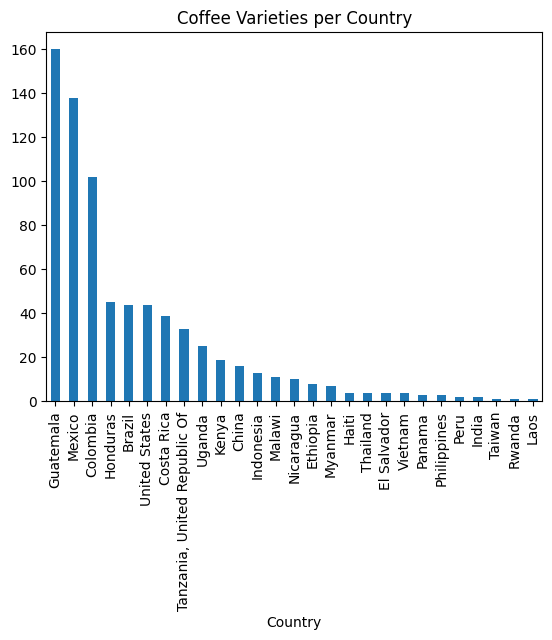

In [14]:
coffee_subset["Country"].value_counts().plot(kind="bar",
                                             title="Coffee Varieties per Country")

Let's make this a little more interesting: 

If we try to plot `Country` against `Bags` without aggregating our observations by country first, a nonsensical plot results. We haven't aggregated our data by country, so this graph attempts to plot hundreds of discrete observations.

<Axes: xlabel='Country'>

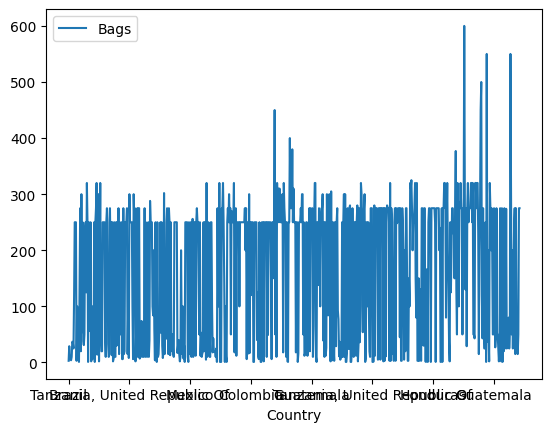

In [15]:
coffee_subset.plot(x="Country", y="Bags")

A pattern for Pandas plotting is to *group by* a categorical variable on the x-axis and aggregate a quantitative variable on the y-axis. In this case, our categorical variable is `Country` and the quantitative one is `Bags`.

In [16]:
coffee_subset.groupby("Country")["Bags"].sum()

Country
Brazil                           7111
China                              55
Colombia                        23126
Costa Rica                       8151
El Salvador                       840
Ethiopia                         1980
Guatemala                       32318
Haiti                             304
Honduras                        11515
India                             640
Indonesia                        1318
Kenya                            2865
Laos                                1
Malawi                            557
Mexico                          16547
Myanmar                             8
Nicaragua                        3026
Panama                            437
Peru                              375
Philippines                       256
Rwanda                            150
Taiwan                              2
Tanzania, United Republic Of     2910
Thailand                          102
Uganda                           3867
United States                     501
Viet

<Axes: xlabel='Country'>

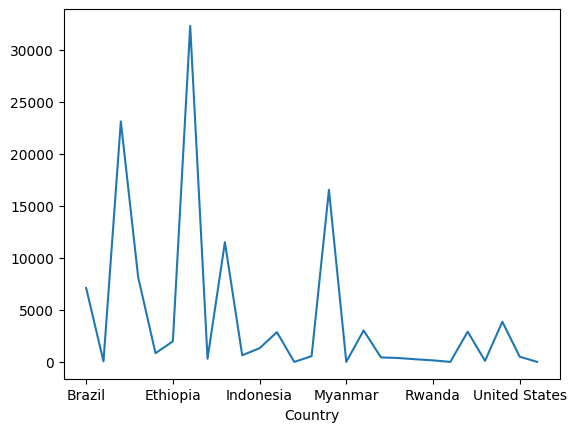

In [17]:
coffee_subset.groupby("Country")["Bags"].sum().plot()

Let's change this plot to a bar graph, as a line graph doesn't make sense for categorical data.

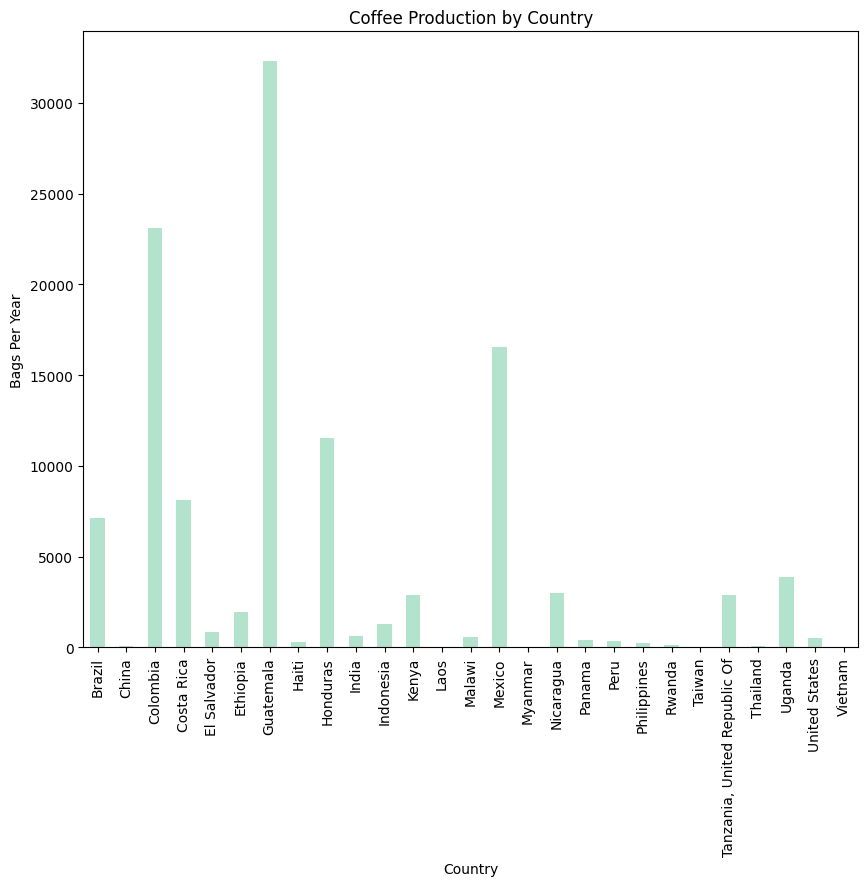

In [18]:
c_plot = coffee_subset.groupby("Country")["Bags"].sum().plot(kind="bar",
                                                             title="Coffee Production by Country",
                                                             xlabel="Country",
                                                             ylabel="Bags Per Year",
                                                             colormap="Pastel2",
                                                             figsize=(10, 8))

Once we've configured our quick plot to our satisfaction, let's write it out.

In [19]:
c_plot.figure.savefig("output/production.png")

To output a **DataFrame** to disk, we can use the **to_csv()** method. It takes in a filepath as an argument.

In [20]:
coffee_subset.to_csv("output/coffee_cleaned.csv", index=False) 

By default, **.to_csv()** will reserve the leftmost column of the output for the index. Because our index is just a row number, it is preferable to suppress the index with index=False.

## Data from the Internet: Using a URL

Let's talk about reading in files from the internet. Our next dataset is hosted on GitHub, and we will be reading it in from a URL rather than downloading to our local filesystem.

In [21]:
URL = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
pldb = pd.read_csv(URL, index_col="pldb_id")
pldb.head(5)

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,400.0,401,37.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,source.java,programming,java,java jav,11529980.0,https://en.wikipedia.org/wiki/Java_(programmin...,5242.0,11543.0,Java is a general-purpose computer programming...,15881.0,1995.0,2001.0,7818.0,javascript pizza ada csharp eiffel mesa modula...,True,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,349.0,351,48.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,source.js,programming,javascript,js _js bones cjs es es6 frag gs jake javascrip...,16046489.0,https://en.wikipedia.org/wiki/JavaScript,4264.0,8982.0,"JavaScript (), often abbreviated as JS, is a h...",9845.0,1995.0,2001.0,6131.0,java lua scheme perl self c python awk hyperta...,True,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,78.0,78,19.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,source.c,programming,c_cpp,c cats h idc,2160271.0,https://en.wikipedia.org/wiki/C_(programming_l...,6268.0,10585.0,"C (, as in the letter c) is a general-purpose,...",6021.0,2011.0,2001.0,7316.0,cyclone unified-parallel-c split-c cilk b bcpl...,True,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,339.0,342,52.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,source.python,programming,python,py cgi fcgi gyp gypi lmi py3 pyde pyi pyp pyt ...,9300725.0,https://en.wikipedia.org/wiki/Python_(programm...,7204.0,6849.0,Python is a widely used high-level programming...,23862.0,1991.0,2001.0,6342.0,jython micropython stackless-python cython abc...,True,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,177.0,182,37.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,source.sql,data,sql,sql cql ddl inc mysql prc tab udf viw,1222.0,https://en.wikipedia.org/wiki/SQL,3084.0,4159.0,SQL ( ( listen) ESS-kew-EL or ( listen) SEE-k...,29004.0,1986.0,2001.0,4153.0,sql-92 datalog linq powershell c sql-psm sqlpl...,True,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


Because we have an index column, we can look up languages by their pldb ID. If we want to find the `creators` of the language `python`, we can use `.loc` to retrieve 

In [22]:
pldb.loc["python", "creators"]

'Guido van Rossum'

## Manipulating DataFrames

Sometimes we want to change values in DataFrames in a systematic way. Let's start with creation new columns as a function of **other columns**. 

Operations on Series are vectorized. That means they are applied to each individual entry in the Series in parallel.

In [23]:
pldb["appeared"]

pldb_id
java                         1995
javascript                   1995
c                            1972
python                       1991
sql                          1974
                             ... 
vtl                          1976
wizml                        1997
wolontis-bell-interpreter    1955
xl                           1977
xql                          1999
Name: appeared, Length: 4303, dtype: int64

In [24]:
pldb["appeared"] + 2000 # This is shorthand for adding 20 to each value in the Series

pldb_id
java                         3995
javascript                   3995
c                            3972
python                       3991
sql                          3974
                             ... 
vtl                          3976
wizml                        3997
wolontis-bell-interpreter    3955
xl                           3977
xql                          3999
Name: appeared, Length: 4303, dtype: int64

Unlike *aggregation* functions, vectorized operations return a Series or DataFrame of the same size.

In [25]:
pldb["appeared"].median() # This will return one value, it aggregates

1997.0

The plus symbol as applied to a Series of type Object (string) and a string *concatenates* the string to each item in the Series.

In [26]:
pldb["creators"] + " and Abraham Lincoln" # concatenates and Abraham lincoln to each

pldb_id
java                                         James Gosling and Abraham Lincoln
javascript                                    Brendan Eich and Abraham Lincoln
c                                           Dennis Ritchie and Abraham Lincoln
python                                    Guido van Rossum and Abraham Lincoln
sql                          Donald D. Chamberlin and Raymond F. Boyce and ...
                                                   ...                        
vtl                          Garry Shannon and Frank McCoy and Abraham Lincoln
wizml                                                                      NaN
wolontis-bell-interpreter                                                  NaN
xl                                                                         NaN
xql                                         Jonathan Robie and Abraham Lincoln
Name: creators, Length: 4303, dtype: object

We can also make new Series through operations on two Series of the same length.

Let's say we want to add a new column to the DataFrame called `years_active` that represents the **difference** in time that has elaspsed since the language `appeared` and when it was last active `last_activity`.

In [27]:
pldb["years_active"] = pldb["last_activity"] - pldb["appeared"] # Creates new column
pldb.head() 

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source,years_active
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,400.0,401,37.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,source.java,programming,java,java jav,11529980.0,https://en.wikipedia.org/wiki/Java_(programmin...,5242.0,11543.0,Java is a general-purpose computer programming...,15881.0,1995.0,2001.0,7818.0,javascript pizza ada csharp eiffel mesa modula...,True,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN,27
javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,349.0,351,48.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,source.js,programming,javascript,js _js bones cjs es es6 frag gs jake javascrip...,16046489.0,https://en.wikipedia.org/wiki/JavaScript,4264.0,8982.0,"JavaScript (), often abbreviated as JS, is a h...",9845.0,1995.0,2001.0,6131.0,java lua scheme perl self c python awk hyperta...,True,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN,27
c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,78.0,78,19.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,source.c,programming,c_cpp,c cats h idc,2160271.0,https://en.wikipedia.org/wiki/C_(programming_l...,6268.0,10585.0,"C (, as in the letter c) is a general-purpose,...",6021.0,2011.0,2001.0,7316.0,cyclone unified-parallel-c split-c cilk b bcpl...,True,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN,50
python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,339.0,342,52.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,source.python,programming,python,py cgi fcgi gyp gypi lmi py3 pyde pyi pyp pyt ...,9300725.0,https://en.wikipedia.org/wiki/Python_(programm...,7204.0,6849.0,Python is a widely used high-level programming...,23862.0,1991.0,2001.0,6342.0,jython micropython stackless-python cython abc...,True,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN,31
sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,177.0,182,37.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,source.sql,data,sql,sql cql ddl inc mysql prc tab udf viw,1222.0,https://en.wikipedia.org/wiki/SQL,3084.0,4159.0,SQL ( ( listen) ESS-kew-EL or ( listen) SEE-k...,29004.0,1986.0,2001.0,4153.0,sql-92 datalog linq powershell c sql-psm sqlpl...,True,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN,48


Now, let's see what programming languages were active for the longest amount of time by sorting the DataFrame by our new column. Hint: remember **.sort_values()**?

In [28]:
pldb.sort_values(by="years_active", ascending=False)

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source,years_active
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
babylonian-numerals,Babylonian numerals,The Babylonian system is credited as being the...,numeralSystem,-2000,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Babylonian_numerals,210.0,186.0,"Babylonian numerals were written in cuneiform,...",152323.0,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969,1070,0,NaN,NaN,NaN,NaN,3969
euclidean-geometry,Euclidean geometry,NaN,notation,-300,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Euclidean_geometry,1084.0,1284.0,Euclidean geometry is a mathematical system at...,9417.0,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951,5440,0,NaN,NaN,NaN,NaN,2251
arabic-numerals,Hindu-Arabic numeral system,NaN,numeralSystem,825,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Hindu–Arabic_num...,656.0,632.0,The Hindu–Arabic numeral system or Indo-Arabic...,3393371.0,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969,3300,0,NaN,NaN,NaN,NaN,1144
balanced-ternary-notation,Balanced ternary,NaN,notation,1544,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Balanced_ternary,72.0,160.0,Balanced ternary is a non-standard positional ...,376757.0,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963,380,0,NaN,NaN,NaN,NaN,419
binary-notation,Binary notation,NaN,notation,1689,Gottfried Leibniz,NaN,NaN,NaN,https://writings.stephenwolfram.com/2013/05/dr...,0.0,1,1.0,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Binary_code,939.0,447.0,"A binary code represents text, computer proces...",219202.0,1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971,4715,0,NaN,NaN,NaN,NaN,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bx,bx,NaN,pl,1990,NaN,http://www.skrenta.com/bx/,NaN,NaN,NaN,NaN,0,NaN,2779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990,1,0,Commodore-Amiga,0.0,NaN,NaN,0
business-rule-language,business-rule-language,Business Rule Language (BRL) allows IF/THEN te...,pl,2012,NaN,https://webfocusinfocenter.informationbuilders...,NaN,NaN,https://infocenter.informationbuilders.com/wf8...,NaN,0,NaN,2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,0,NaN,0.0,NaN,NaN,0
brl,BRL,NaN,pl,1997,NaN,http://web.mit.edu/wwwdev/brl/intro.html,NaN,NaN,NaN,NaN,0,NaN,2777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,1,0,Massachusetts Institute of Technology,0.0,NaN,NaN,0


That brings us to an interesting, do programming languages that have been active for longer have more available jobs *today*? **Aside**: Do not take this dataset as job advice.

First, we need our filter our data using boolean indexing to *recent* programming languages and languages that have at least 100 jobs.

In [29]:
viable = pldb[(pldb["years_active"] < 60) & (pldb["number_of_jobs"] > 100)]

<Axes: title={'center': 'Programming Language Activity'}, xlabel='Years Active', ylabel='Jobs Available'>

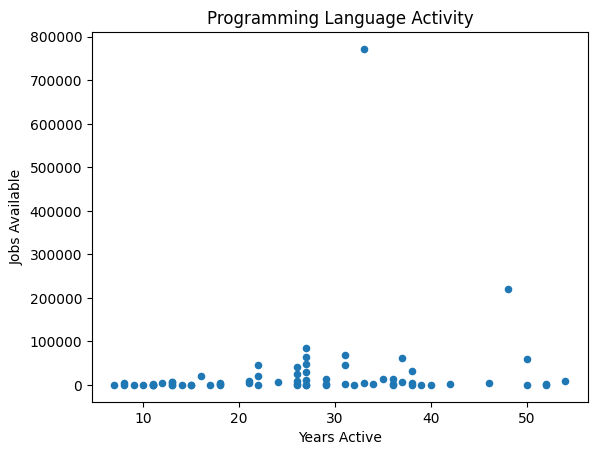

In [30]:
viable.plot(kind="scatter",
          x="years_active",
          y="number_of_jobs",
          xlabel="Years Active",
          ylabel="Jobs Available",
          title="Programming Language Activity",
         )

Sorting the DataFrame by the `number_of_jobs` in descending order gives us the identity of those two prominent points: HTTP and SQL. 

In [31]:
viable.sort_values("number_of_jobs", ascending=False).head(5)

,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,isbndb,book_count,semantic_scholar,language_rank,github_repo,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,github_repo_created,github_repo_description,github_repo_issues,github_repo_first_commit,github_language,github_language_tm_scope,github_language_type,github_language_ace_mode,github_language_file_extensions,github_language_repos,wikipedia,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_summary,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,wikipedia_related,features_has_comments,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source,years_active
pldb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http,HTTP,NaN,protocol,1989,NaN,NaN,NaN,NaN,NaN,9.0,12,2.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP,source.httpspec,data,text,http,0.0,https://en.wikipedia.org/wiki/Hypertext_Transf...,6702.0,1996.0,The Hypertext Transfer Protocol (HTTP) is an a...,13443.0,1999.0,2001.0,4080.0,ftp smtp tls tcp udp url html css ascii gzip r...,NaN,NaN,NaN,NaN,2022,33780,771996,The World Wide Web Consortium,0.0,na,NaN,33
sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,177.0,182,37.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,source.sql,data,sql,sql cql ddl inc mysql prc tab udf viw,1222.0,https://en.wikipedia.org/wiki/SQL,3084.0,4159.0,SQL ( ( listen) ESS-kew-EL or ( listen) SEE-k...,29004.0,1986.0,2001.0,4153.0,sql-92 datalog linq powershell c sql-psm sqlpl...,True,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN,48
java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,400.0,401,37.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,source.java,programming,java,java jav,11529980.0,https://en.wikipedia.org/wiki/Java_(programmin...,5242.0,11543.0,Java is a general-purpose computer programming...,15881.0,1995.0,2001.0,7818.0,javascript pizza ada csharp eiffel mesa modula...,True,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN,27
html,HTML,NaN,textMarkup,1991,Tim Berners-Lee,NaN,NaN,NaN,NaN,111.0,116,7.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML,text.html.basic,markup,html,html hta htm htmlhl inc xht xhtml,12648584.0,https://en.wikipedia.org/wiki/HTML,4897.0,15298.0,Hypertext Markup Language (HTML) is the standa...,13191.0,1993.0,2001.0,7612.0,sgml css javascript webgl dtd rfc xml unicode ...,True,False,False,NaN,2022,5570873,69531,Conseil Européen pour la Recherche Nucléaire,0.0,text,NaN,31
javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,349.0,351,48.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,source.js,programming,javascript,js _js bones cjs es es6 frag gs jake javascrip...,16046489.0,https://en.wikipedia.org/wiki/JavaScript,4264.0,8982.0,"JavaScript (), often abbreviated as JS, is a h...",9845.0,1995.0,2001.0,6131.0,java lua scheme perl self c python awk hyperta...,True,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN,27


Now, using **groupby**, let's ask how many (of the popular langauges in `viable`) languages were introduced per year over the last few decades to make a line graph representing the number of new languages introduced per year. 

<Axes: title={'center': 'Programming Languages per Year'}, xlabel='Year', ylabel='# of Popular Languages Introduced'>

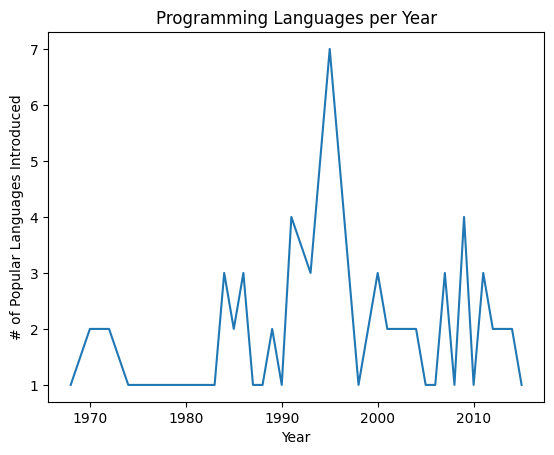

In [32]:
viable.groupby("appeared")["title"].count().plot(
    kind="line",
    xlabel="Year",
    ylabel="# of Popular Languages Introduced",
    title="Programming Languages per Year"
)

Let's say I want to find out what the distribution of language types (as assigned by Github) is. For reference, this is contained in the `github_language_type` variable.

We can adjust the colormap using any of the palettes from [Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

<Axes: title={'center': 'Programming Languages by Type'}, ylabel='count'>

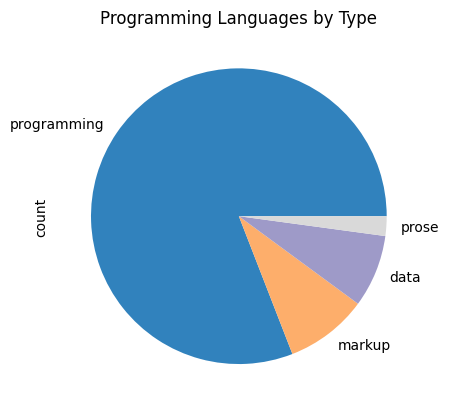

In [33]:
pldb["github_language_type"].value_counts().plot(
    kind="pie",
    title="Programming Languages by Type",
    colormap="tab20c")